In [37]:
from cmath import inf, sqrt
from codecs import unicode_escape_decode
from heapq import heapify, heappop, heappush
from queue import PriorityQueue
from PIL import Image, ImageDraw
import numpy as np
import sys
import random
from bresenham import bresenham
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

In [38]:
occupancy_map_img = Image.open('occupancy_map.png')
M = (np.asarray(occupancy_map_img) > 0).astype(int)

start = [635, 140]
end = [350, 400]

In [39]:
###########################################
#           PART A
###########################################

# a-i
def RecoverPath(start, goal, pred):
    path = RecoverPathHelper(start, goal, [], pred)
    return path

# a-i
def RecoverPathHelper(start, goal, path, pred):
    if (start == goal):
        return [(start[0], start[1])]
    else:
        return RecoverPathHelper(start, pred[''.join(map(str, goal))], path, pred) + [(goal[0], goal[1])]

# a-ii
def A_Star(V, start, goal, N, w, h):
    cost_to = {}
    est_total_cost = {}
    Q = []
    pred = {}

    for vertex in V:
        cost_to[''.join(map(str, vertex))] = inf
        est_total_cost[''.join(map(str, vertex))] = inf

    cost_to[''.join(map(str, start))] = 0
    est_total_cost[''.join(map(str, start))] = h(start, goal)
    Q.append([h(start, goal), start])

    while not (len(Q) == 0):
        vertexToExplore = heappop(Q)[1]

        if (vertexToExplore == goal):
            return RecoverPath(start, goal, pred)

        for neighbor in N(vertexToExplore):
            pvi = cost_to[''.join(map(str, vertexToExplore))] + \
                w(vertexToExplore, neighbor)

            if pvi < cost_to[''.join(map(str, neighbor))]:
                pred[''.join(map(str, neighbor))] = vertexToExplore
                cost_to[''.join(map(str, neighbor))] = pvi
                est_total_cost[''.join(map(str, neighbor))
                               ] = pvi + h(neighbor, goal)

                found = False
                for vertex in Q:
                    if (vertex[1] == neighbor):
                        vertex[0] = est_total_cost[''.join(map(str, neighbor))]
                        found = True

                if (not found):
                    heappush(
                        Q, [est_total_cost[''.join(map(str, neighbor))], neighbor])

    return []

In [59]:
###########################################
#               PART B
###########################################

# b-i
def unoccupiedNeighbors(v):
    unoccupiedNeighbors = []
    # top left
    if (not (v[0] == 0) and not (v[1] == 0)):
        if (M[v[0]-1][v[1]-1]) == 1:
            unoccupiedNeighbors.append([v[0]-1, v[1]-1])
    # left
    if (not (v[0] == 0)):
        if (M[v[0]-1][v[1]]) == 1:
            unoccupiedNeighbors.append([v[0]-1, v[1]])
    # bottom left
    if (not (v[0] == 0) and not (v[1] == len(M[0])-1)):
        if (M[v[0]-1][v[1]+1]) == 1:
            unoccupiedNeighbors.append([v[0]-1, v[1]+1])
    # below
    if (not (v[1] == 0)):
        if (M[v[0]][v[1]-1]) == 1:
            unoccupiedNeighbors.append([v[0], v[1]-1])
    # top right
    if (not (v[0] == len(M)-1) and not (v[1] == 0)):
        if (M[v[0]+1][v[1]-1]) == 1:
            unoccupiedNeighbors.append([v[0]+1, v[1]-1])
    # right
    if (not (v[0] == len(M)-1)):
        if (M[v[0]+1][v[1]]) == 1:
            unoccupiedNeighbors.append([v[0]+1, v[1]])
    # bottom right
    if (not (v[0] == len(M)-1) and not (v[1] == len(M[0])-1)):
        if (M[v[0]+1][v[1]+1]) == 1:
            unoccupiedNeighbors.append([v[0]+1, v[1]+1])
    # above
    if (not (v[1] == len(M[0])-1)):
        if (M[v[0]][v[1]+1]) == 1:
            unoccupiedNeighbors.append([v[0], v[1]+1])

    return unoccupiedNeighbors

# b-ii
def distance(v1, v2):
    if (v1[0] == v2[0] or v1[1] == v2[1]):
        return 1
    else:
        return 2**0.5

# b-iii
def euclideanDistance(v1, v2):
    return (((v1[0] - v2[0]) * (v1[0] - v2[0])) + ((v1[1] - v2[1]) * (v1[1] - v2[1])))**0.5

# b-iii
def findTotalDistance(listOfPoints):
    prevNode = listOfPoints.pop(0)
    totalDistance = 0
    for point in listOfPoints:
        totalDistance = totalDistance + euclideanDistance(prevNode, point)
        prevNode = point
    return totalDistance

In [60]:
# b-iii
vertexSet = []
for x in range(len(M)):
    for y in range(len(M[0])):
        vertexSet.append([x, y])

path = A_Star(vertexSet, start, end, unoccupiedNeighbors,
              distance, euclideanDistance)

inversePath = []

for point in path:
    inversePath.append((point[1], point[0]))


with Image.open('occupancy_map.png') as im:
    draw = ImageDraw.Draw(im)
    draw.line(inversePath, width=3, fill='red')

    im.show()

In [61]:
# b-iii
A_star_Distance = findTotalDistance(inversePath)
A_star_Distance

801.7005768508895

In [42]:
# c-i
def getRandomSample(Map):
    xSize = len(Map)
    ySize = len(Map[0])
    samplePointValue = 0
    while samplePointValue == 0:
        randomX = random.sample(range(xSize), 1)[0]
        randomY = random.sample(range(ySize), 1)[0]
        samplePointValue = Map[randomX][randomY]

    return (randomX, randomY)

# c-ii
def reachableByStraightLine(Map, vertex1, vertex2):
    pointsToCheck = list(
        bresenham(vertex1[0], vertex1[1], vertex2[0], vertex2[1]))

    for point in pointsToCheck:
        if (Map[point[0]][point[1]] == 0):
            return False

    return True

# c-iii
def addVertex(graph, newVertex, searchRadius, map):
    nextNodeNum = graph.number_of_nodes() + 1
    graph.add_node(nextNodeNum, pos=(newVertex[0], newVertex[1]))

    for vertex in graph.nodes(data=True):
        if (not (vertex[0] == nextNodeNum)):

            if (reachableByStraightLine(map, newVertex, vertex[1]['pos'])):
                distanceBetweenNodes = euclideanDistance(
                    newVertex, vertex[1]['pos'])
                if (distanceBetweenNodes < searchRadius):
                    node1 = nextNodeNum
                    node2 = vertex[0]
                    graph.add_edge(nextNodeNum, vertex[0],
                                   weight=distanceBetweenNodes)

# c-iii
def createPRM(numSamples, searchRadius, map):
    graph = nx.Graph()

    for i in range(numSamples):
        newVertex = getRandomSample(map)
        addVertex(graph, newVertex, searchRadius, map)

    return graph

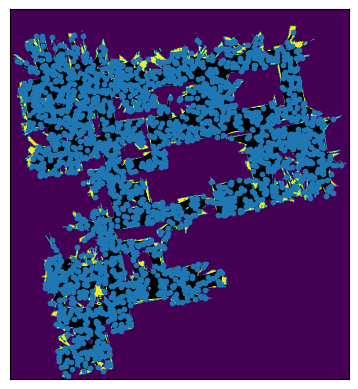

In [55]:
# c-iv
PRM = createPRM(2500, 75, M)
nodes = PRM.nodes()
nodeDictionary = {}
for node in nodes:
    pos = nodes[node]['pos']
    nodeDictionary[node] = (pos[1], pos[0])
    # nodeDictionary[node] = (pos[1], len(M)-pos[0])

nx.draw_networkx(PRM, pos=nodeDictionary, node_size=10, with_labels=False)

plt.imshow(occupancy_map_img)
plt.show()

In [58]:
# c-v
addVertex(PRM, (start[0], start[1]), 75, M)
addVertex(PRM, (end[0],end[1]), 75, M)
prmPath = nx.astar_path(PRM, 2501, 2502, heuristic=None, weight='weight')

inversePrmPath = []

for point in prmPath:
    pointPos = nodes[point]['pos']
    inversePrmPath.append((pointPos[1], pointPos[0]))

with Image.open('occupancy_map.png') as im:
    draw = ImageDraw.Draw(im)
    draw.line(inversePrmPath, width=3, fill='red')

    im.show()



In [62]:
PRM_A_star_Distance = findTotalDistance(inversePrmPath)
PRM_A_star_Distance

806.4061476924891